<a href="https://colab.research.google.com/github/antonysama/Projects_w._time_series/blob/master/Prescription_Pharma_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prescrition Drug Program Analysis

###Loading R and packages

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
# Install and load packages
%%capture
%%R
install.packages(c('dplyr','tidyverse','janitor', 'skimr','ggplot2','reshape2','readxl'))
x<-c('dplyr','tidyverse','janitor','skimr', 'ggplot2','reshape2','readxl')
lapply(x, require, character.only = TRUE)

###Read and load file named 'part 2' (i.e. population estimates)

In [ ]:
#read part2 file
%%R
# part_2<-read_excel('part_2.xlsx', sheet = "Sheet1", guess_max = 1048576)
part_2 <- read_excel("drive/MyDrive/part_2.xlsx", sheet = "Sheet1", col_types =c('text','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric',
                                                                                   'numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric','numeric') )
part_2<- part_2 %>% filter(Year > 2013,Sex <3)
str(part_2)

tibble [14 × 25] (S3: tbl_df/tbl/data.frame)
 $ Area      : chr [1:14] "Nomansland" "Nomansland" "Nomansland" "Nomansland" ...
 $ Year      : num [1:14] 2014 2015 2016 2017 2018 ...
 $ Sex       : num [1:14] 1 1 1 1 1 1 1 2 2 2 ...
 $ Population: num [1:14] 2071960 2099166 2118319 2136817 2164303 ...
 $ 0-4       : num [1:14] 137286 138655 139620 139642 139247 ...
 $ 5-9       : num [1:14] 130283 135291 139196 140891 141489 ...
 $ 10-14     : num [1:14] 119630 121825 124729 128492 132918 ...
 $ 15-19     : num [1:14] 127283 127036 127245 127415 128837 ...
 $ 20-24     : num [1:14] 151178 149394 146121 142692 142193 ...
 $ 25-29     : num [1:14] 174173 175856 173568 169865 167722 ...
 $ 30-34     : num [1:14] 176094 178986 180945 180760 180345 ...
 $ 35-39     : num [1:14] 157144 160159 162753 166610 171710 ...
 $ 40-44     : num [1:14] 148064 148737 148565 149672 152954 ...
 $ 45-49     : num [1:14] 141248 139433 140539 142184 143767 ...
 $ 50-54     : num [1:14] 152443 150078 145626 1

###Melt age catergoy to better aggregate the age data

In [ ]:
%%R
part_2a<- melt(part_2, id=c("Area","Year", "Sex", "Population"))
# skim_without_charts(part_2a)

── Data Summary ────────────────────────
                           Values 
Name                       part_2a
Number of rows             294    
Number of columns          6      
_______________________           
Column type frequency:            
  character                1      
  factor                   1      
  numeric                  4      
________________________          
Group variables            None   

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 Area                  0             1    10    10     0        1          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 variable              0             1 FALSE         21
  top_counts                        
1 0-4: 14, 5-9: 14, 10-: 14, 15-: 14

── Variable type: numeric ───────────────────────────────────────

### Do a selective group by and sum up seniors (>65) by year

In [ ]:
#Tabulate Expinditure by Year ($M)
%%R
population<-part_2a %>%
 filter(part_2a$variable %in% c("60-64","65-69","70-74","75-79","80-84","85-89","90-94","95-99","100+")) %>%
  group_by(Year) %>%
     summarize(Population  = sum(value)) %>%
          arrange(desc(Year))
population

# A tibble: 7 × 2
   Year Population
  <dbl>      <dbl>
1  2020     869567
2  2019     832894
3  2018     795605
4  2017     760057
5  2016     726176
6  2015     695765
7  2014     668001


###Supplementary Analysis: Create five age categories, at 20 year intervals, and plot

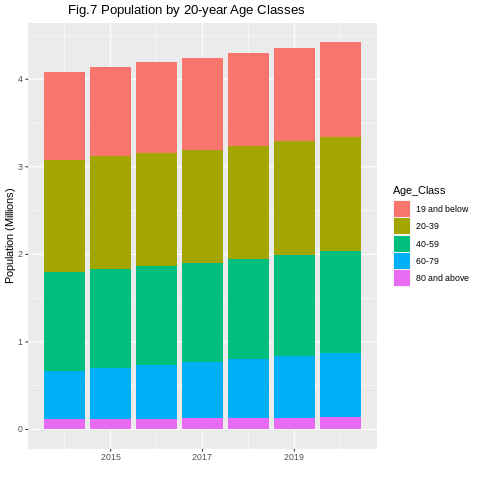

In [ ]:
%%R
part_2a$Age_Class<-ifelse(part_2a$variable %in% c("0-4","5-9","10-14","15-19"),"19 and below", ifelse(part_2a$variable %in% c("20-24","25-29","30-34","35-39"),"20-39", ifelse(part_2a$variable %in% c("40-44","45-49","50-54","55-59"),"40-59",ifelse(part_2a$variable %in% c("60-64","65-69","70-74","75-79"), "60-79","80 and above"))))
p<-ggplot(part_2a, aes(x=Year, y=value/1000000, fill=Age_Class)) + geom_col(stat="identity")+ ggtitle("          Fig.7 Population by 20-year Age Classes ") + xlab("") + ylab("Population (Millions)")
p

### Read and load file 'part 3' i.e., publicly funded drug data




In [ ]:
#read part3
%%R
part_3 <- read_excel("drive/MyDrive/part_3.xlsx", sheet = "Sheet1", col_types = c('numeric','text','text','numeric','numeric') )
str(part_3)

tibble [252 × 5] (S3: tbl_df/tbl/data.frame)
 $ Year       : num [1:252] 2014 2014 2014 214 2014 ...
 $ Program    : chr [1:252] "PaidInsurance" "PaidInsurance" "PaidInsurance" "PaidInsurance" ...
 $ Month      : chr [1:252] "JAN" "FEB" "MAR" "APR" ...
 $ Claims     : num [1:252] 98416 88059 98024 97491 99249 ...
 $ Expenditure: num [1:252] 13179661 11930679 13676162 12366256 12718452 ...


### Correct erros in names of programs and years 

In [ ]:
#correct names and years for part3
%%R
part_3$Year_Corrected<-ifelse(part_3$Year  %in% c( "217", "2172017"), 2017, ifelse(part_3$Year %in% c("V214","214"), 2014,part_3$Year ))
part_3$Program_Corrected<-ifelse(part_3$Program == "Paid", "PaidInsurance", ifelse(part_3$Program =="Subsid", "Subsidized",ifelse(part_3$Program=="Senior", "Seniors",part_3$Program )))
# skim_without_charts(part_3)

### Correct Expenditure by Capping Outliers at 0.05 and 0.95 percentile

In [ ]:
#Create function to cap the outliers
# Other references for outlier deletion: https://www.r-bloggers.com/2020/01/how-to-remove-outliers-in-r/ 
%%R
fun <- function(x){
    quantiles <- quantile( x, c(.05, .95 ) )
    x[ x < quantiles[1] ] <- quantiles[1]
    x[ x > quantiles[2] ] <- quantiles[2]
    x
}
part_3$Expenditure_Corrected <- fun(part_3$Expenditure)
skim_without_charts(part_3)

── Data Summary ────────────────────────
                           Values
Name                       part_3
Number of rows             252   
Number of columns          9     
_______________________          
Column type frequency:           
  character                3     
  numeric                  6     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable     n_missing complete_rate   min   max empty n_unique
1 Program                   0             1     4    13     0        6
2 Month                     0             1     3     3     0       12
3 Program_Corrected         0             1     7    13     0        3
  whitespace
1          0
2          0
3          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable         n_missing complete_rate      mean          sd      p0
1 Year                          0        

### Aggregate the Expenditures by Year

In [ ]:
#Tabulate Expinditure by Year ($M)
%%R
expenditure<-part_3 %>%
  group_by(Year_Corrected) %>%
     summarize(Cumltv_Expenditure  = sum(Expenditure_Corrected)) %>%
          arrange(desc(Year_Corrected))
expenditure

# A tibble: 7 × 2
  Year_Corrected Cumltv_Expenditure
           <dbl>              <dbl>
1           2020         786225488.
2           2019         796532976.
3           2018         734825026.
4           2017         719509843.
5           2016         658339185.
6           2015         666669701.
7           2014         593872678.


###Filte Expenditure Per Year for Senior Plans

In [ ]:
#Tabulate Expinditure by Year ($M)
%%R
expenditure_senior<-part_3 %>%
 filter(part_3$Program %in% c("Senior","Seniors")) %>%
  group_by(Year_Corrected) %>%
      summarize(Cumltv_Expenditure  = sum(Expenditure_Corrected)) %>%
          arrange(desc(Year_Corrected))
expenditure_senior

# A tibble: 7 × 2
  Year_Corrected Cumltv_Expenditure
           <dbl>              <dbl>
1           2020         530537334.
2           2019         547513732.
3           2018         503086146 
4           2017         492560559 
5           2016         454889875 
6           2015         473274585.
7           2014         439758149 


### Plot Expenditure by Year, broken down by Program

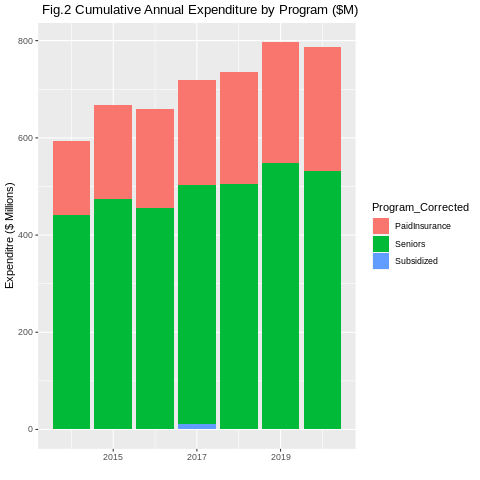

In [ ]:
#Plot the total broken down by program
%%R
q<-ggplot(part_3, aes(x=Year_Corrected, y=Expenditure_Corrected/1000000, fill=Program_Corrected)) + 
    geom_col(stat="identity")+ ggtitle(" Fig.2 Cumulative Annual Expenditure by Program ($M)") + xlab("") + ylab("Expenditre ($ Millions)")
q

### Supplementary Analysis: Sum up Number of Claims by Year

In [ ]:
#Tabulate Number of Claims by Year ($M)
%%R
part_3 %>%
  group_by(Year_Corrected) %>%
     summarize(Number_of_Claims = sum(Claims/1000000, na.rm = TRUE)) %>%
          arrange(desc(Year_Corrected))


# A tibble: 7 × 2
  Year_Corrected Number_of_Claims
           <dbl>            <dbl>
1           2020             15.9
2           2019             14.5
3           2018             13.5
4           2017             14.9
5           2016             12.0
6           2015             12.0
7           2014             11.6


###Supplementary Analysis: Estimate and Plot Expenditure Per Claim

In [ ]:
#Create New Variable for Corrected Expenditure Per Claim
%%R
part_3$ExpendPerClaim<-part_3$Expenditure/part_3$Claims

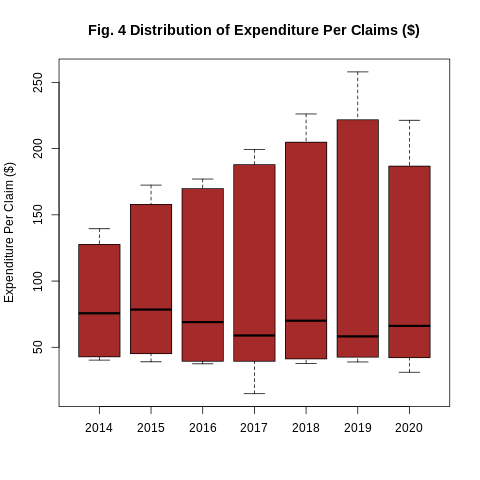

In [ ]:
%%R
boxplot(part_3$ExpendPerClaim ~ part_3$Year_Corrected, ylab="Expenditure Per Claim ($)", xlab="", main="Fig. 4 Distribution of Expenditure Per Claims ($)",outline=FALSE,col="brown",
border="black")

### Estimate Expenditure Per Senior (>65 yr) Person

In [ ]:
%%R
#merge above files on expenditure and popluations 
# divide the columns
expenditure_senior <- rename(expenditure_senior, Year=Year_Corrected)
m<-merge(expenditure_senior, population) 
m$per_cap_exp<-m$Cumltv_Expenditure/m$Population
m

  Year Cumltv_Expenditure Population per_cap_exp
1 2014          439758149     668001    658.3196
2 2015          473274585     695765    680.2219
3 2016          454889875     726176    626.4182
4 2017          492560559     760057    648.0574
5 2018          503086146     795605    632.3316
6 2019          547513732     832894    657.3630
7 2020          530537334     869567    610.1167


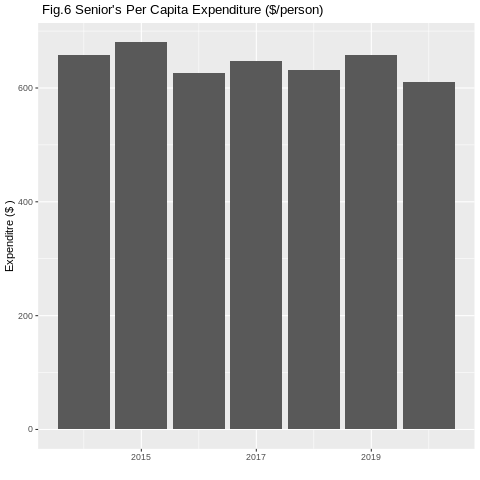

In [ ]:
%%R
q<-ggplot(m, aes(x=Year, y=per_cap_exp,)) + 
    geom_col(stat="identity")+ ggtitle(" Fig.6 Senior's Per Capita Expenditure ($/person)") + xlab("") + ylab("Expenditre ($ )")
q

In [ ]:
%%R
write.csv(part_3,"drive/MyDrive/part_3.csv", row.names = FALSE)